In [37]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Step 1 : Sorting countries per use of fertilizer 

In [2]:
#opening database and visualization
fertilizer=pd.read_csv('./data/Emissions_Agriculture_Synthetic_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1961,1961,kg,1000000.0,E,NaN
1,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1962,1962,kg,1000000.0,E,NaN
2,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1963,1963,kg,1000000.0,E,NaN
3,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1964,1964,kg,1000000.0,E,NaN
4,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1965,1965,kg,1000000.0,E,NaN


In [3]:
#Determining countries most fertilizer consumer for the last year of using
(fertilizer.query('`Element Code` == (5163, 5162)')
    .query('`Year Code` == 2017')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
).head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
23958,41,"China, mainland",3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,2.961900e+10,Fm,NaN
54169,100,India,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,1.695930e+10,P,NaN
117124,231,United States of America,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,1.164932e+10,Qm,NaN
13949,21,Brazil,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,5.172707e+09,Fb,NaN
85907,165,Pakistan,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,3.446922e+09,Qm,NaN


In [4]:
# As the previous sorting is not fully representative (we have a quantity of nutrient and not a quantity per surface)
#We will rather use another dataset :
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer_area.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2002,2002,kg/ha,3.02,Fc


In [5]:
#Sorting as previously (but the last year is 2016 and not 2017)
(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
).head(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2030,59,Egypt,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,366.87,Fc
4328,150,Netherlands,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,244.89,Fc
1366,41,"China, mainland",3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,225.81,Fc
3609,256,Luxembourg,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,216.58,Fc
595,255,Belgium,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,216.36,Fc
3871,134,Malta,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,204.47,Fc
6390,225,United Arab Emirates,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,180.74,Fc
1538,48,Costa Rica,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,176.84,Fc
6435,229,United Kingdom,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,171.26,Fc
5777,207,Suriname,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,171.21,Fc


We could maybe improve it by making the average on all year

#### Step 2 : Studying crops production for most fertilizer user countries
Visualising for maybe the 3 first countries, what are the most produced crops.
We would like finding a country where one crop could be representative of most of fertilizer use


In [6]:
# We will need crop dataset to get the area harvested for each crop (as we have pesticive for an area of cropland)
crop=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crop.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F


In [25]:
# crop production for egypt (could be a function)
x=59
egypt_crop=(crop.query('`Area Code` == %d'%(x))
    .query('`Year Code` == 2017')
    .query('`Item Code` <1000')# to avoid getting value of aggregated crop (ex:cereal ...)
    .query('`Element Code` == 5312')
    .sort_values('Value', ascending=False)
)
egypt_crop.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
527103,59,Egypt,15,Wheat,5312,Area harvested,2017,2017,ha,1342805.0,Im


In [28]:
area_tot=egypt_crop.Value.sum()
print(area_tot)

5485623.0


In [34]:
# Getting a new column with the part of each area harvested on the total one
egypt_crop=egypt_crop.assign(Part= lambda df : df.Value/area_tot)
egypt_crop.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Part
527103,59,Egypt,15,Wheat,5312,Area harvested,2017,2017,ha,1342805.0,Im,0.244786
520879,59,Egypt,56,Maize,5312,Area harvested,2017,2017,ha,920601.0,Im,0.167821
523653,59,Egypt,27,"Rice, paddy",5312,Area harvested,2017,2017,ha,685908.0,Im,0.125037
525152,59,Egypt,157,Sugar beet,5312,Area harvested,2017,2017,ha,236732.0,Im,0.043155
526125,59,Egypt,388,Tomatoes,5312,Area harvested,2017,2017,ha,182444.0,Im,0.033259


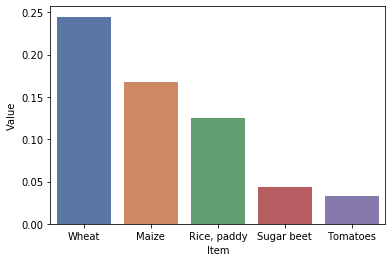

In [41]:
sns.barplot(x=egypt_crop.Item.head(5), y=egypt_crop.Value.head(5)/area_tot, palette="deep")

In [86]:
# creating a function which plot 5 main crops of a country
def main_crop_plot(x):
    '''x is the country code'''
    country_crop=(crop.query('`Area Code` == %d'%(x))
        .query('`Year Code` == 2017')
        .query('`Item Code` <1000')# to avoid getting value of aggregated crop (ex:cereal ...)
        .query('`Element Code` == 5312')
        .sort_values('Value', ascending=False)
    )
    area_tot=country_crop.Value.sum()
    return (country_crop.Item.head(5),country_crop.Value.head(5)/area_tot)
    

    

In [ ]:
sns.barplot(x=country_crop.Item.head(5), y=country_crop.Value.head(5)/area_tot, palette="deep")

AttributeError: 'AxesSubplot' object has no attribute 'sns'

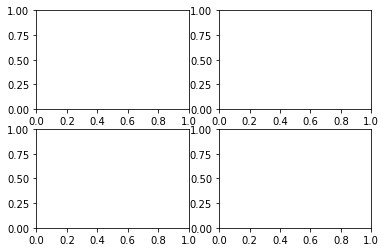

In [91]:
fig, axs = plt.subplots(2, 2)
p=[]
p.append(main_crop_plot(59))
sns.barplot(x=p[0][1], y=p[0][0], palette="deep")


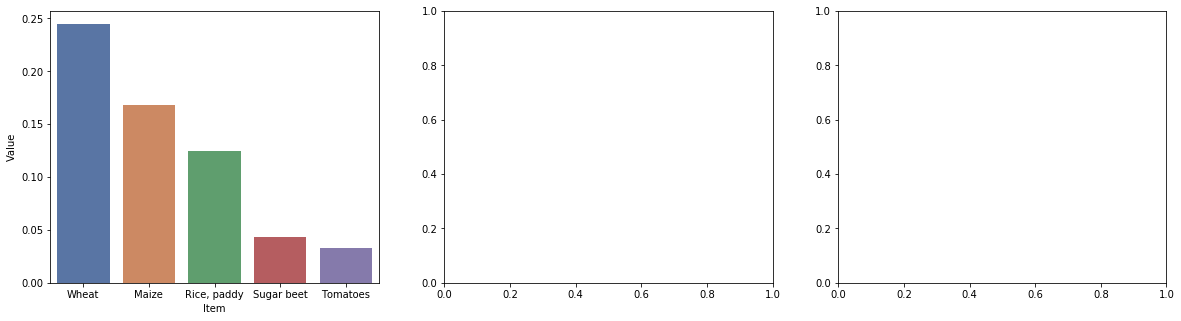

In [93]:
fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

p=[]
p.append(main_crop_plot(59))
sns.barplot(x=p[0][0], y=p[0][1], palette="deep",ax=ax1)

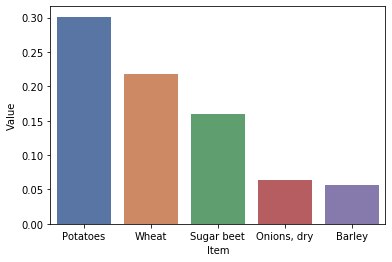

In [85]:
#netherland plot
main_crop_plot(150)

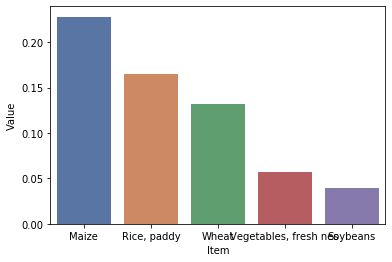

In [60]:
main_crop_plot(41)

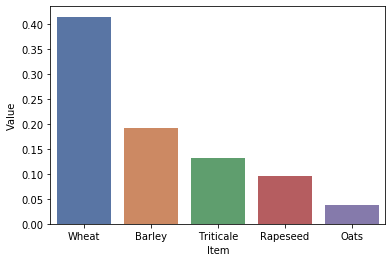

In [61]:
main_crop_plot(256)